<a href="https://colab.research.google.com/github/courtneytumolac/Data-Science/blob/main/CourTumoU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is about the Japan national football (soccer) team all time winning rate for all A internationals.
* Data: https://www.11v11.com/teams/japan/tab/stats/#google_vignette



In [1]:
!pip install preliz


#We'll also need to re-import those libraries

#makes pretty flow charts of our models, known as kruschke diagrams
#from pykrusch import krusch

import preliz as pz


#These libraries don't need to be reinstalled each time, but they will need to be
#re-imported each time

import numpy as np
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 380.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


I already knew that Japan isn't super commendable/noticeable in terms of their soccer skills. They're at average or maybe slightly above or below, not super good or super bad. I'm pretty confident in this guess which is why the graph is tight.

<Axes: >

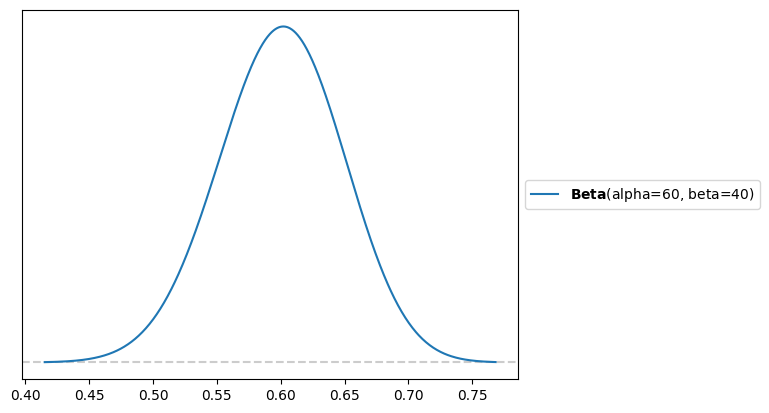

In [2]:
# Prior graph (60% win rate)

pz.Beta(alpha=60,beta=40).plot_pdf()

Different guesses based on this prior.

In [3]:
#store the prior distribution for the Win Rate (WR) percentage
WR_prior = pz.Beta(alpha=60,beta=40)

#preliz does not have a function that returns the mode, so I will use a formula
WR_prior_mode = (WR_prior.alpha - 1)/(WR_prior.alpha + WR_prior.beta - 2)

#the mean mean first, then median, and finally mode
WR_prior.mean(), WR_prior.median(), WR_prior_mode

(0.6, 0.6006692560095892, 0.6020408163265306)

Japan's team has played a total of 854 A international games. They've made 182 draws and 271 losses. This means they won 401 times.

In [4]:
#loading pymc, the fancy library of functions that allows us to only focus on θ
import pymc as pm

In [5]:
#arviz is a companion data visualization library for pymc
import arviz as az

We can use that data to make a posterior of their all time win rate...

<Axes: title={'center': 'θ'}>

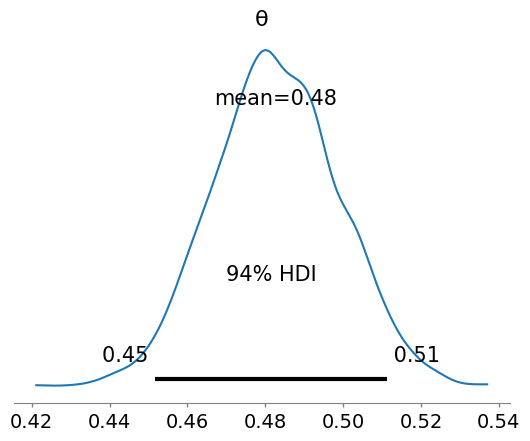

In [7]:
#Japan's team all time game stats, their wins then their draws + losses
WR_data_alltime = np.repeat([1,0], repeats = [401,453])


with pm.Model() as japan_WR_alltime_model:
  #same prior from before
  θ = pm.Beta('θ' , alpha = 60. , beta = 40.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = WR_data_alltime)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_WR_alltime = pm.sample(2000)

#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(idata_WR_alltime)

I'm not going to lie, I'm really disappointed in Japan right now. I knew they weren't good, but I didn't know they were this bad. A mean of 0.48 is kind of insane. That being said, my prediction was pretty spot on, although I'm genuinely surprised by the findings.